In [433]:
import math
import random
import matplotlib.pyplot as plt
import numpy as np
def oRoster():
    x = open("roster.txt", "r")
    lines = x.readlines()
    roster = {}
    for line in lines:
        i,j = line.split(":")
        roster[i] = int(j.split("\n")[0])
    return roster

In [434]:
def ELO(Won, Lost, roster):
    #roster = oRoster()
    winTotal = 0
    for i in Won:
        winTotal += roster[i]
    winAverage = winTotal/5
    
    
    
    loseTotal = 0
    for i in Lost:
        loseTotal += roster[i]
    loseAverage = loseTotal/5
    
    
    
    difference = loseAverage - winAverage
    for i in Won:
        roster[i] += f(difference)
    for i in Lost:
        roster[i] -= f(difference)
    return roster

In [471]:
def f(x):
    #return (math.log(abs(x)+1) *20 + 30) - (math.log(( (abs(x)-x) /2)+1)*24 - 20)
    return (x**3)/100000000 + 100

In [436]:
def testELO(roster):
    
    Won = ["10slayer", "CyborgSteve", "AmericanHussar", "Cade", "Daniel"]
    Lost = ["ColinJH", "aijinxed","chibikitty" , "GentileBanan",  "Imperialpayload"]


    
    base = []
    for i in roster:
        base.append(i)
    for i in range(5):
        current = base[random.randint(0, len(base)-1)]
        Won[i] =  current
        base.remove(current)
    for i in range(5):
        current = base[random.randint(0, len(base)-1)]
        Lost[i] =  current
        base.remove(current)
    roster = WeightELO(Won,Lost,roster)
    return roster
    


In [437]:
def WeightELO(Win, Lose, roster):
    winTotal = 0
    for i in Win:
        winTotal += roster[i]
    winAverage = winTotal/5
    
    
    
    loseTotal = 0
    for i in Lose:
        loseTotal += roster[i]
    loseAverage = loseTotal/5
    
    if winAverage < loseAverage:
        Greater = Lose
        Lower = Win
        x = winAverage
        winAverage = loseAverage
        loseAverage = x
    else:
        Greater = Win
        Lower = Lose
    difference = winAverage - loseAverage
    Gprob = math.log(difference+1)/math.log(2001)
    Lprob = 1 - Gprob
    choice = random.choices([Greater,Lower], weights = [Gprob, Lprob], k = 1)
    if choice[0] == Greater:
        return ELO(Greater, Lower,roster)
    else:
        return ELO(Lower,Greater,roster)
        

In [462]:
def Distribution(roster):
    print("hello")
    n = 2000
    change = []
    for i in range (n):
        new = testELO(roster.copy())
        for j in roster:
            if new[j] != roster[j]:
                change.append(new[j] - roster[j])
        roster = new.copy()
    
    fig, (ax1, hist) = plt.subplots(2)
    ax1.plot(change, "ro")
    hist.hist(change)
    plt.show()
   

In [439]:
def Change(roster):
    n = 2000
    change = []
    new = roster.copy()
    for i in range (n):
        testELO(new)
    for i in roster:
        change.append(roster[i]-new[i])
    
    fig, (ax1, hist) = plt.subplots(2)
    ax1.plot(change, "ro")
    hist.hist(change)
    plt.show()

In [461]:
def Individual(roster):
    n = 2000
    change = []
    new = roster.copy()
    for i in range (n):
        testELO(new)
    for i in roster:
        change.append(roster[i]-new[i])
    names = []
    for i in roster:
        names.append(i)
    plt.figure(figsize=(30, 3))
    plt.bar(names, change)
    plt.show()
    

In [466]:
roster = oRoster()
print(roster)

{'10slayer': 1300, 'aijinxed': 900, 'AmericanHussar': 1200, 'Cade': 1300, 'chibikitty': 800, 'ColinJH': 1000, 'CyborgSteve': 1600, 'Daniel': 1700, 'GentileBanan': 800, 'Imperialpayload': 800, 'Inugami': 1300, 'Ksiu': 2300, 'SexiMexi247': 1400, 'Trick Live': 1400, 'Xerelic': 1400, 'Kevalon': 1400}


hello


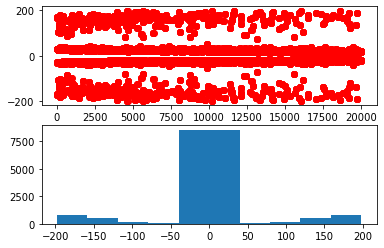

In [467]:
Distribution(roster.copy())

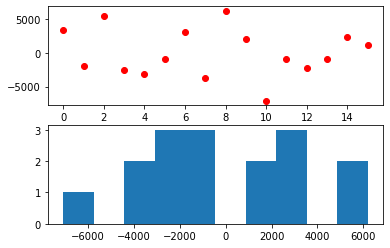

In [468]:
Change(roster.copy())

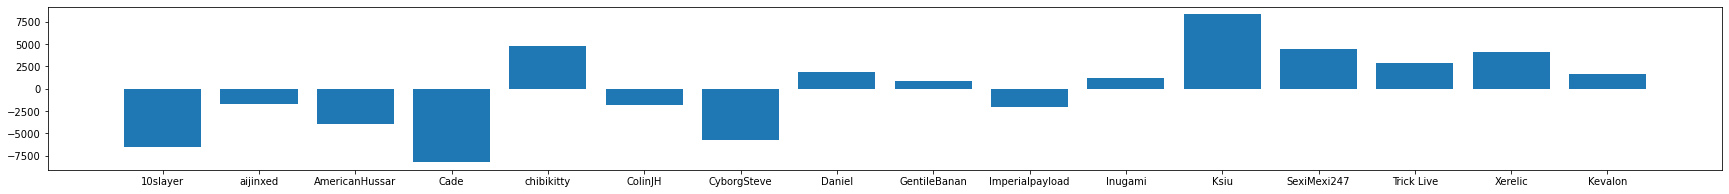

In [469]:
Individual(roster.copy())

32.422203381310254
137.8889830934488


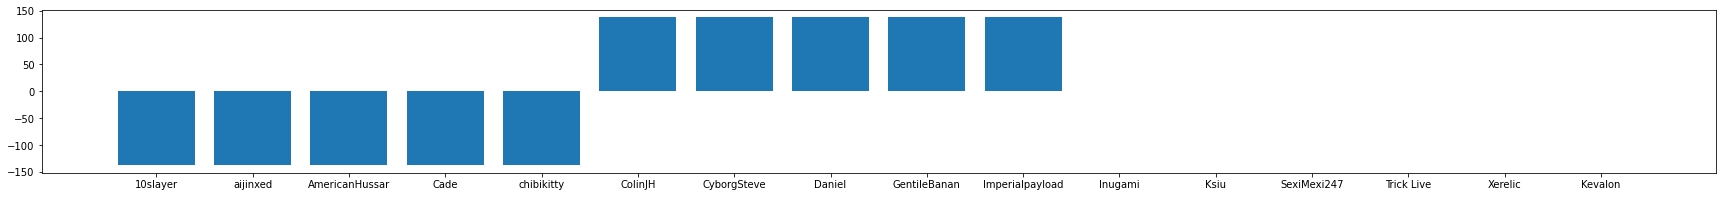

In [443]:
Won = ["10slayer", "aijinxed", "AmericanHussar", "Cade", "chibikitty"]
Lost = ["ColinJH","CyborgSteve" ,"Daniel" , "GentileBanan",  "Imperialpayload"]
new = WeightELO(Won, Lost, roster.copy())
change=[]
print(f(-80))
print(f(80))
for i in roster:
    change.append(roster[i]-new[i])
names = []
for i in roster:
    names.append(i)
plt.figure(figsize=(30, 3))
plt.bar(names, change)
plt.show()

In [455]:
def g(x):
    return (x**3)/100000000 + 100

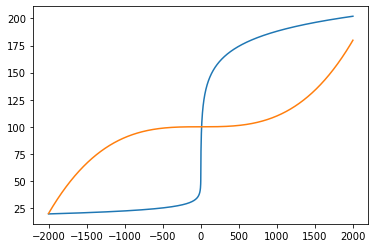

In [458]:
y = []
x = []
x2= []
y2= []
for i in range(-2000, 2000):
    x.append(i)
    y.append(f(i))
for i in range(-2000, 2000):
    x2.append(i)
    y2.append(g(i))
plt.plot(x, y)
plt.plot(x2,y2)
plt.show()

In [470]:
for i in range(-2000, 2000):
    print(g(i))
print(g(80))
print(g(-80))
print(f(80))
print(f(-80))

20.0
20.119940009999993
20.239760079999996
20.35946027
20.479040639999994
20.598501249999998
20.717842160000004
20.83706343
20.956165119999994
21.075147290000004
21.194010000000006
21.312753310000005
21.431377280000007
21.54988197
21.668267439999994
21.786533750000004
21.904680959999993
22.022709129999996
22.14061832
22.258408590000002
22.37608
22.493632610000006
22.611066480000005
22.728381670000005
22.845578239999995
22.962656249999995
23.079615759999996
23.196456830000002
23.313179520000006
23.429783889999996
23.546270000000007
23.66263791
23.778887679999997
23.89501937
24.01103304
24.126928750000005
24.242706560000002
24.358366529999998
24.473908719999997
24.589333190000005
24.704639999999998
24.819829209999995
24.93490088
25.049855070000007
25.164691840000003
25.279411249999995
25.394013360000002
25.50849823
25.622865919999995
25.737116490000005
25.851249999999993
25.965266510000006
26.079166079999993
26.19294877
26.306614640000006
26.42016375
26.533596160000002
26.64691193
26.760